In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import time
# importing webdriver from selenium
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys

In [10]:
sephora = pd.read_csv('../Hey-I-am-a-data-analyst/Data/sephora.csv')

In [11]:
sephora

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,Fragrance
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,Fragrance
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,Fragrance
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,Fragrance
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0,Fragrance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8178,1601111,SEPHORA COLLECTION,Brush Sets,Face the Day: Full Face Brush Set,no size,3.5,62,32900,49.0,95.0,...,limited edition · exclusive,no options,What it is:\nA six-piece brush set designed to...,no instructions,unknown,0,1,1,0,Makeup
8179,2149839,SEPHORA COLLECTION,Scrub & Exfoliants,Exfoliating Body Granita Scrub - Surprise Flowers,8.45oz/250mL,3.5,39,6900,8.0,8.0,...,exclusive · online only,no options,What it is: An indulgent- yet gentle exfoliat...,Suggested Usage:-Apply to wet skin.-Massage in...,Water- Glycerin- Cellulose Acetate- Sodium Lau...,1,1,0,0,Bath & Body
8180,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0,Skincare
8181,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0,Makeup


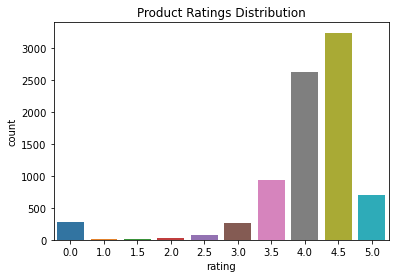

In [41]:
sns.countplot(x='rating', data=sephora).set_title("Product Ratings Distribution");

After verifying that most of the products are rated with more than 4 starts, we can filter them to exclude the ones that are not that popular among our online users.

Products with a rating higher than 4 stars

In [14]:
top_rated_products = sephora[sephora.rating >= 4]

In [15]:
top_rated_products

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0,Fragrance
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0,Fragrance
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0,Fragrance
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0,Fragrance
5,1417609,Acqua Di Parma,Perfume,Fico di Amalfi,5 oz/ 148 mL,4.5,79,2600,180.0,180.0,...,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Floral Scent Type: Fruity Fl...,no instructions,unknown,1,0,0,0,Fragrance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8172,1927904,SEPHORA COLLECTION,Eye Palettes,Winter Magic Eyeshadow Palette,8 x 0.04 oz/ 1.3 g,4.0,156,51800,10.0,10.0,...,limited edition · exclusive,no options,What it is:\n \nA travel-size palette of eight...,no instructions,unknown,0,1,1,0,Makeup
8173,2271062,SEPHORA COLLECTION,Scrub & Exfoliants,Sugar Body Scrub,400 mL/ 13.5 oz,4.0,6,1900,17.0,17.0,...,exclusive,no options,What it is: A sugar body scrub that exfoliate...,Suggested Usage:-Apply in the shower twice a w...,-Brown Sugar from Natural Origin: Known to gen...,0,1,0,0,Bath & Body
8174,1937796,SEPHORA COLLECTION,Eye Brushes,Smoky Eyes: Uncomplicated Brush Set,no size,4.0,83,33600,39.0,79.0,...,exclusive,no options,What it is: A five-piece set of must-have make...,no instructions,unknown,0,1,0,0,Tools & Brushes
8175,1867464,SEPHORA COLLECTION,Sponges & Applicators,The Sculptor - Airbrush Sponge,no size,4.0,22,8300,12.0,12.0,...,exclusive,no options,What it is:\n A blending- sculpting- and highl...,Suggested Usage:\n-Wet the sponge with water t...,unknown,0,1,0,0,Tools & Brushes


In [16]:
top_rated_products.brand.value_counts()

SEPHORA COLLECTION    336
CLINIQUE              154
TOM FORD              117
Dior                  112
tarte                 107
                     ... 
Jillian Dempsey         1
Flora + Bast            1
Lunar Beauty            1
DL.MD                   1
High Beauty             1
Name: brand, Length: 313, dtype: int64

In [98]:
np.quantile(sephora.love, [.05, .25, .5, .75, .95, .99])

array([   308.1,   1800. ,   5100. ,  14600. ,  68470. , 194918. ])

Above, we had projected the distibution of the products based on the number of loves that they have. "Love" is a similiar metric such as "like" in Facebook that reflects the level of engagement that our online users have with the products listed on the website.

Products that are in the TOP 5 of the most loved on the platform

In [18]:
love_and_rate = top_rated_products[top_rated_products.love >= 68470] #top 5%

In [19]:
love_and_rate.brand.value_counts()

SEPHORA COLLECTION         27
tarte                      19
Anastasia Beverly Hills    19
NARS                       17
FENTY BEAUTY by Rihanna    16
                           ..
Bumble and bumble           1
Herbivore                   1
Ciaté London                1
La Mer                      1
Josie Maran                 1
Name: brand, Length: 86, dtype: int64

In [20]:
love_and_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 240 to 7941
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      390 non-null    int64  
 1   brand                   390 non-null    object 
 2   category                390 non-null    object 
 3   name                    390 non-null    object 
 4   size                    390 non-null    object 
 5   rating                  390 non-null    float64
 6   number_of_reviews       390 non-null    int64  
 7   love                    390 non-null    int64  
 8   price                   390 non-null    float64
 9   value_price             390 non-null    float64
 10  URL                     390 non-null    object 
 11  MarketingFlags          390 non-null    bool   
 12  MarketingFlags_content  390 non-null    object 
 13  options                 390 non-null    object 
 14  details                 390 non-null   

Makeup Under $20

In [22]:
makeup_20 = love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Makeup",:]

In [23]:
makeup_20

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category
261,2036408,Anastasia Beverly Hills,Lipstick,Liquid Lipstick,0.11 oz / 3.2 g,4.0,4000,549000,20.0,20.0,...,0,no options,What it is: A full-pigment- matte formula that...,Suggested Usage:-Begin by applying Liquid Lips...,Isododecane- Trimethylsiloxysilicate- Boron Ni...,0,0,0,0,Makeup
266,1962695,Anastasia Beverly Hills,Lipstick,Matte Lipstick,.12 oz/ 3.5 g,4.5,818,112900,18.0,18.0,...,0,no options,What it is:A full-pigment lip color with a smo...,Suggested Usage:-Using Brush 3 (sold separatel...,Caprylic/Capric Triglyceride- Octyldodecanol- ...,0,0,0,0,Makeup
271,1941970,Anastasia Beverly Hills,Eyeshadow,Eye Shadow Singles,0.059 oz/ 1.67 g,4.5,687,565200,12.0,12.0,...,0,no options,What it is:\nA finely-milled- full pigment- ey...,Precautions:\n-Store in a cool- dry place.,Boron Nitride- Dimethicone- Nylon-12- Zinc Ste...,0,0,0,0,Makeup
274,2093565,Anastasia Beverly Hills,Lip Gloss,Lip Gloss,0.16 oz/ 4.73 mL,4.5,1000,208100,16.0,16.0,...,0,no options,What it is:\n A fully-pigmented- weightless li...,Precautions:\n-Store in a cool- dry place.,Polybutene- Octyldodecanol- Hydrogenated Polyi...,0,0,0,0,Makeup
466,1845478,bareMinerals,Lipstick,GEN NUDE™ Liquid Lipstick,0.13 oz/ 4 mL,4.5,1000,115300,20.0,20.0,...,0,no options,What it is: A collection of primer-infused- fu...,Suggested Usage:\n-Apply with the paddle appli...,-Primer-infused Ingredients: Gives a gorgeous...,0,0,0,0,Makeup
1311,1972223,Ciaté London,Lipstick,Glitter Flip,0.10 oz/ 2.98 g,4.0,930,91500,19.0,19.0,...,exclusive,no options,What it is:A transforming glitter liquid lipst...,Suggested Usage:-Simply apply one even coat of...,Isododecane- Synthetic Fluorphlogopite- Octyld...,0,1,0,0,Makeup
1506,1307859,CLINIQUE,Lip Balm & Treatment,Chubby Stick Moisturizing Lip Colour Balm,0.1 oz/ 3 g,4.5,2000,77700,18.5,18.5,...,0,no options,What it is: \nA nourishing tinted lip balm tha...,Suggested Usage:-Apply directly to lips.-For s...,Ricinus Communis (Castor) Seed Oil - Caprylic/...,0,0,0,0,Makeup
2503,2327245,FENTY BEAUTY by Rihanna,Lip Gloss,Gloss Bomb Universal Lip Luminizer,0.3 oz/ 9 mL,4.5,10000,553300,19.0,19.0,...,exclusive,no options,What it is: An ultimate- gotta-have-it lip glo...,Suggested Usage:-Wear Gloss Bomb alone or laye...,Polybutene- Octyldodecanol- Bis-Diglyceryl Pol...,0,1,0,0,Makeup
2516,2156487,FENTY BEAUTY by Rihanna,Lipstick,Mattemoiselle Plush Matte Lipstick,0.06 oz/ 1.7 g,4.5,2000,349300,18.0,18.0,...,exclusive,no options,What it is: An ultra-slim lipstick with a long...,Suggested Usage:\nMattemoiselle was designed t...,Octyldodecanol- Polyethylene- Candelilla Cera/...,0,1,0,0,Makeup
3206,2001576,HUDA BEAUTY,Lipstick,Liquid Matte Lipstick,0.17 oz/ 5 mL,4.0,2000,358600,20.0,20.0,...,limited edition · exclusive,no options,What it is:\nA highly comfortable- long wear l...,Suggested Usage:\nCreate the perfect lip look:...,Isododecane- Cyclopentasiloxane- Cera Alba (Be...,0,1,1,0,Makeup


In [24]:
display(makeup_20.iloc[1])

id                                                                  1962695
brand                                               Anastasia Beverly Hills
category                                                           Lipstick
name                                                         Matte Lipstick
size                                                          .12 oz/ 3.5 g
rating                                                                  4.5
number_of_reviews                                                       818
love                                                                 112900
price                                                                  18.0
value_price                                                            18.0
URL                       https://www.sephora.com/product/matte-lipstick...
MarketingFlags                                                        False
MarketingFlags_content                                                    0
options     

In [25]:
display(makeup_20.iloc[1]['details'])

'What it is:A full-pigment lip color with a smooth- ultra-matte finish.What it does: Get beautiful- classic matte lips in a flash with this highly-pigmented lipstick. Matte Lipstick provides a soft- elegant- and lasting finish in enough shades to satisfy any lip aficionado. The comfortable- matte formula is now available in six new nude shades.What it is formulated WITHOUT:- Parabens- Sulfates- PhthalatesWhat else you need to know: To create a lacquer finish- pair with Lip Gloss (sold separately). For a metallic finish- pair with Glow Kit (sold separately).'

In [26]:
display(makeup_20.iloc[1]['how_to_use'])

'Suggested Usage:-Using Brush 3 (sold separately)- work directly off Matte Lipstick to define the lip line or detail the lips.-For on-the-go touch ups- perfect the perimeter of the lips using Pro Pencil (sold separately).-To create the look of volume- apply a lighter shade of Matte Lipstick in the center of the lips or top with Lip Gloss (sold separately).'

In [27]:
display(makeup_20.iloc[1]['ingredients'])

'Caprylic/Capric Triglyceride- Octyldodecanol- Isononyl Isononanoate- Bis-Diglyceryl Polyacyladipate-2- Polyglyceryl-2 Triisostearate- Nylon-12- Pentaerythrityl Tetrabehenate- Polyethylene- Synthetic Wax- Kaolin- Hydrogenated Microcrystalline Wax/Cire Microcristalline/Cera Microcristallina- Ozokerite- Pentaerythrityl Tetra-Di-T-Butyl Hydroxyhydrocinnamate- Simmondsia Chinensis (Jojoba) Seed Oil- Sodium Magnesium Silver Phosphate- Tocopheryl Acetate- Triethoxycaprylylsilane- May Contain(+/-): Mica- Red 7 Lake (Ci 15850)- Red 6 (Ci 15850)- Yellow 5 Lake (Ci 19140)- Blue 1 Lake (Ci 42090)- Red 27 Lake (Ci 45410)- Iron Oxides (Ci 77491- Ci 77492- Ci 77499)- Titanium Dioxide (Ci 77891).'

In [28]:
makeup_20["Shades"] = np.nan

In [29]:
makeup_20

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category,Shades
261,2036408,Anastasia Beverly Hills,Lipstick,Liquid Lipstick,0.11 oz / 3.2 g,4.0,4000,549000,20.0,20.0,...,no options,What it is: A full-pigment- matte formula that...,Suggested Usage:-Begin by applying Liquid Lips...,Isododecane- Trimethylsiloxysilicate- Boron Ni...,0,0,0,0,Makeup,NaN
266,1962695,Anastasia Beverly Hills,Lipstick,Matte Lipstick,.12 oz/ 3.5 g,4.5,818,112900,18.0,18.0,...,no options,What it is:A full-pigment lip color with a smo...,Suggested Usage:-Using Brush 3 (sold separatel...,Caprylic/Capric Triglyceride- Octyldodecanol- ...,0,0,0,0,Makeup,NaN
271,1941970,Anastasia Beverly Hills,Eyeshadow,Eye Shadow Singles,0.059 oz/ 1.67 g,4.5,687,565200,12.0,12.0,...,no options,What it is:\nA finely-milled- full pigment- ey...,Precautions:\n-Store in a cool- dry place.,Boron Nitride- Dimethicone- Nylon-12- Zinc Ste...,0,0,0,0,Makeup,NaN
274,2093565,Anastasia Beverly Hills,Lip Gloss,Lip Gloss,0.16 oz/ 4.73 mL,4.5,1000,208100,16.0,16.0,...,no options,What it is:\n A fully-pigmented- weightless li...,Precautions:\n-Store in a cool- dry place.,Polybutene- Octyldodecanol- Hydrogenated Polyi...,0,0,0,0,Makeup,NaN
466,1845478,bareMinerals,Lipstick,GEN NUDE™ Liquid Lipstick,0.13 oz/ 4 mL,4.5,1000,115300,20.0,20.0,...,no options,What it is: A collection of primer-infused- fu...,Suggested Usage:\n-Apply with the paddle appli...,-Primer-infused Ingredients: Gives a gorgeous...,0,0,0,0,Makeup,NaN
1311,1972223,Ciaté London,Lipstick,Glitter Flip,0.10 oz/ 2.98 g,4.0,930,91500,19.0,19.0,...,no options,What it is:A transforming glitter liquid lipst...,Suggested Usage:-Simply apply one even coat of...,Isododecane- Synthetic Fluorphlogopite- Octyld...,0,1,0,0,Makeup,NaN
1506,1307859,CLINIQUE,Lip Balm & Treatment,Chubby Stick Moisturizing Lip Colour Balm,0.1 oz/ 3 g,4.5,2000,77700,18.5,18.5,...,no options,What it is: \nA nourishing tinted lip balm tha...,Suggested Usage:-Apply directly to lips.-For s...,Ricinus Communis (Castor) Seed Oil - Caprylic/...,0,0,0,0,Makeup,NaN
2503,2327245,FENTY BEAUTY by Rihanna,Lip Gloss,Gloss Bomb Universal Lip Luminizer,0.3 oz/ 9 mL,4.5,10000,553300,19.0,19.0,...,no options,What it is: An ultimate- gotta-have-it lip glo...,Suggested Usage:-Wear Gloss Bomb alone or laye...,Polybutene- Octyldodecanol- Bis-Diglyceryl Pol...,0,1,0,0,Makeup,NaN
2516,2156487,FENTY BEAUTY by Rihanna,Lipstick,Mattemoiselle Plush Matte Lipstick,0.06 oz/ 1.7 g,4.5,2000,349300,18.0,18.0,...,no options,What it is: An ultra-slim lipstick with a long...,Suggested Usage:\nMattemoiselle was designed t...,Octyldodecanol- Polyethylene- Candelilla Cera/...,0,1,0,0,Makeup,NaN
3206,2001576,HUDA BEAUTY,Lipstick,Liquid Matte Lipstick,0.17 oz/ 5 mL,4.0,2000,358600,20.0,20.0,...,no options,What it is:\nA highly comfortable- long wear l...,Suggested Usage:\nCreate the perfect lip look:...,Isododecane- Cyclopentasiloxane- Cera Alba (Be...,0,1,1,0,Makeup,NaN


In [31]:
! export PATH=$PATH:~/Downloads

In [32]:
import time

In [57]:
def execute_product_search(driver, product):
    search = driver.find_element_by_class_name("css-1ij6iqe")
    search.send_keys(str(product) + Keys.ENTER)

def close_register_user_window(driver):
    driver.find_element_by_class_name("css-1kna575").click()
    
def show_list_of_shades(driver):
    driver.find_element_by_xpath("/html/body/div[1]/div[2]/div/main/div/div[1]/div[3]/div[1]/div/div[2]/div[2]/button[3]").click()
    
def extract_shades_names(driver):
    html = driver.page_source
    soup = BeautifulSoup(html)
    shades = soup.find_all("div", {"data-at":"color_swatch_name"})
    final_shades = [ex.text for ex in shades]
    return final_shades

In [58]:
total_shades = []

for i in makeup_20["id"]:
    driver = webdriver.Chrome('/Users/CB/Downloads/chromedriver-2')
    url = "https://www.sephora.com/"
    driver.get(url)
    try:
        execute_product_search(driver, i)
        close_register_user_window(driver)
        show_list_of_shades(driver)
        final_shades = extract_shades_names(driver)
        s = " "
        total_shades.append(s.join(final_shades))
    except Exception as e:
        total_shades.append("NaN")
    finally:
        driver.close()

In [59]:
len(total_shades)

42

In [60]:
makeup_20.loc[:, 'Shades'] = (total_shades)

In [61]:
makeup_20

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category,Shades
261,2036408,Anastasia Beverly Hills,Lipstick,Liquid Lipstick,0.11 oz / 3.2 g,4.0,4000,549000,20.0,20.0,...,no options,What it is: A full-pigment- matte formula that...,Suggested Usage:-Begin by applying Liquid Lips...,Isododecane- Trimethylsiloxysilicate- Boron Ni...,0,0,0,0,Makeup,Ashton - midtone yellow brown Naked - light p...
266,1962695,Anastasia Beverly Hills,Lipstick,Matte Lipstick,.12 oz/ 3.5 g,4.5,818,112900,18.0,18.0,...,no options,What it is:A full-pigment lip color with a smo...,Suggested Usage:-Using Brush 3 (sold separatel...,Caprylic/Capric Triglyceride- Octyldodecanol- ...,0,0,0,0,Makeup,Staunch - nude sandy pink Dusty Mauve - antiq...
271,1941970,Anastasia Beverly Hills,Eyeshadow,Eye Shadow Singles,0.059 oz/ 1.67 g,4.5,687,565200,12.0,12.0,...,no options,What it is:\nA finely-milled- full pigment- ey...,Precautions:\n-Store in a cool- dry place.,Boron Nitride- Dimethicone- Nylon-12- Zinc Ste...,0,0,0,0,Makeup,Pink Champagne - pinky beige shimmer (titanium...
274,2093565,Anastasia Beverly Hills,Lip Gloss,Lip Gloss,0.16 oz/ 4.73 mL,4.5,1000,208100,16.0,16.0,...,no options,What it is:\n A fully-pigmented- weightless li...,Precautions:\n-Store in a cool- dry place.,Polybutene- Octyldodecanol- Hydrogenated Polyi...,0,0,0,0,Makeup,Gilded - sparkly antique gold St.Tropez Out ...
466,1845478,bareMinerals,Lipstick,GEN NUDE™ Liquid Lipstick,0.13 oz/ 4 mL,4.5,1000,115300,20.0,20.0,...,no options,What it is: A collection of primer-infused- fu...,Suggested Usage:\n-Apply with the paddle appli...,-Primer-infused Ingredients: Gives a gorgeous...,0,0,0,0,Makeup,NaN
1311,1972223,Ciaté London,Lipstick,Glitter Flip,0.10 oz/ 2.98 g,4.0,930,91500,19.0,19.0,...,no options,What it is:A transforming glitter liquid lipst...,Suggested Usage:-Simply apply one even coat of...,Isododecane- Synthetic Fluorphlogopite- Octyld...,0,1,0,0,Makeup,NaN
1506,1307859,CLINIQUE,Lip Balm & Treatment,Chubby Stick Moisturizing Lip Colour Balm,0.1 oz/ 3 g,4.5,2000,77700,18.5,18.5,...,no options,What it is: \nA nourishing tinted lip balm tha...,Suggested Usage:-Apply directly to lips.-For s...,Ricinus Communis (Castor) Seed Oil - Caprylic/...,0,0,0,0,Makeup,Bountiful Blush - sheer dusty rose Chunky Che...
2503,2327245,FENTY BEAUTY by Rihanna,Lip Gloss,Gloss Bomb Universal Lip Luminizer,0.3 oz/ 9 mL,4.5,10000,553300,19.0,19.0,...,no options,What it is: An ultimate- gotta-have-it lip glo...,Suggested Usage:-Wear Gloss Bomb alone or laye...,Polybutene- Octyldodecanol- Bis-Diglyceryl Pol...,0,1,0,0,Makeup,Glass Slipper - clear $weetmouth - shimmering...
2516,2156487,FENTY BEAUTY by Rihanna,Lipstick,Mattemoiselle Plush Matte Lipstick,0.06 oz/ 1.7 g,4.5,2000,349300,18.0,18.0,...,no options,What it is: An ultra-slim lipstick with a long...,Suggested Usage:\nMattemoiselle was designed t...,Octyldodecanol- Polyethylene- Candelilla Cera/...,0,1,0,0,Makeup,Spanked - dusty rose Out of StockSale Thicc - ...
3206,2001576,HUDA BEAUTY,Lipstick,Liquid Matte Lipstick,0.17 oz/ 5 mL,4.0,2000,358600,20.0,20.0,...,no options,What it is:\nA highly comfortable- long wear l...,Suggested Usage:\nCreate the perfect lip look:...,Isododecane- Cyclopentasiloxane- Cera Alba (Be...,0,1,1,0,Makeup,NaN


In [83]:
final_makeup_20 = makeup_20.loc[makeup_20['Shades'] != 'NaN']

In [84]:
final_makeup_20

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer,Fam_Category,Shades
261,2036408,Anastasia Beverly Hills,Lipstick,Liquid Lipstick,0.11 oz / 3.2 g,4.0,4000,549000,20.0,20.0,...,no options,What it is: A full-pigment- matte formula that...,Suggested Usage:-Begin by applying Liquid Lips...,Isododecane- Trimethylsiloxysilicate- Boron Ni...,0,0,0,0,Makeup,Ashton - midtone yellow brown Naked - light p...
266,1962695,Anastasia Beverly Hills,Lipstick,Matte Lipstick,.12 oz/ 3.5 g,4.5,818,112900,18.0,18.0,...,no options,What it is:A full-pigment lip color with a smo...,Suggested Usage:-Using Brush 3 (sold separatel...,Caprylic/Capric Triglyceride- Octyldodecanol- ...,0,0,0,0,Makeup,Staunch - nude sandy pink Dusty Mauve - antiq...
271,1941970,Anastasia Beverly Hills,Eyeshadow,Eye Shadow Singles,0.059 oz/ 1.67 g,4.5,687,565200,12.0,12.0,...,no options,What it is:\nA finely-milled- full pigment- ey...,Precautions:\n-Store in a cool- dry place.,Boron Nitride- Dimethicone- Nylon-12- Zinc Ste...,0,0,0,0,Makeup,Pink Champagne - pinky beige shimmer (titanium...
274,2093565,Anastasia Beverly Hills,Lip Gloss,Lip Gloss,0.16 oz/ 4.73 mL,4.5,1000,208100,16.0,16.0,...,no options,What it is:\n A fully-pigmented- weightless li...,Precautions:\n-Store in a cool- dry place.,Polybutene- Octyldodecanol- Hydrogenated Polyi...,0,0,0,0,Makeup,Gilded - sparkly antique gold St.Tropez Out ...
1506,1307859,CLINIQUE,Lip Balm & Treatment,Chubby Stick Moisturizing Lip Colour Balm,0.1 oz/ 3 g,4.5,2000,77700,18.5,18.5,...,no options,What it is: \nA nourishing tinted lip balm tha...,Suggested Usage:-Apply directly to lips.-For s...,Ricinus Communis (Castor) Seed Oil - Caprylic/...,0,0,0,0,Makeup,Bountiful Blush - sheer dusty rose Chunky Che...
2503,2327245,FENTY BEAUTY by Rihanna,Lip Gloss,Gloss Bomb Universal Lip Luminizer,0.3 oz/ 9 mL,4.5,10000,553300,19.0,19.0,...,no options,What it is: An ultimate- gotta-have-it lip glo...,Suggested Usage:-Wear Gloss Bomb alone or laye...,Polybutene- Octyldodecanol- Bis-Diglyceryl Pol...,0,1,0,0,Makeup,Glass Slipper - clear $weetmouth - shimmering...
2516,2156487,FENTY BEAUTY by Rihanna,Lipstick,Mattemoiselle Plush Matte Lipstick,0.06 oz/ 1.7 g,4.5,2000,349300,18.0,18.0,...,no options,What it is: An ultra-slim lipstick with a long...,Suggested Usage:\nMattemoiselle was designed t...,Octyldodecanol- Polyethylene- Candelilla Cera/...,0,1,0,0,Makeup,Spanked - dusty rose Out of StockSale Thicc - ...
3214,1725639,HUDA BEAUTY,False Eyelashes,Classic False Lashes,no size,4.0,859,162700,20.0,20.0,...,no options,What it is:\nA set of durable- faux lashes for...,Suggested Usage:\n-Remove from packaging.\n-Wi...,-Mellow Fibers: For lash follicles.\n-Cotton ...,0,1,0,0,Makeup,"Giselle #1 - light volume, natural style Cl..."
3230,1958917,HUDA BEAUTY,Lip Gloss,Lip Strobe Metallic Gloss,no size,4.5,424,86500,18.0,18.0,...,no options,What it is:\n A collection of Strobing Metalli...,Suggested Usage:\n-Use alone or on top of your...,Polybutene- Tri-Isodecyl- Trimellitate- Ppg-3-...,0,1,0,0,Makeup,Posh - a semi-sheer white gold Enchanting - a...
4096,1914209,KVD Vegan Beauty,Lip Liner,Everlasting Lip Liner,0.01 oz/ 0.3 g,4.5,1000,113500,19.0,19.0,...,no options,What it is: A lip liner that combines extreme ...,Suggested Usage:-Apply more pressure to get th...,Methyl Trimethicone- Polyethylene- Trimethylsi...,0,1,0,0,Makeup,Bow N Arrow - fawn nude Lovecraft - mauve pin...


In [85]:
final_makeup_20.to_csv('final_makeup_20.csv', index = False)

If we want to replicate this strategy for the rest of the discount initiatives, we simply can filter it by family category

Skincare Under $20

In [97]:
#love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Skincare",:]

Hair Under $20

In [93]:
#love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Hair",:]

Fragrance Under $20

In [94]:
#love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Fragrance",:]

Tools & Brushes Under $20

In [95]:
#love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Tools & Brushes",:]

Bath & Body Under $20

In [92]:
#love_and_rate.loc[love_and_rate.price <= 20,:].loc[love_and_rate.Fam_Category =="Bath & Body",:]